# Demo Scenario 2
> Validate Demonstrate Scenario 2 on a notebook

The goal of this scenario is to demonstrate our built-in tools for integrating computer vision to GPT Function calling in a relevant use case.

The scenario of this demo is a user wanting to test different vision models and visualize their outputs through plotting. Without our application, the user would need to manually set up and configure the models. This process can be complex, requiring significant technical expertise, time, and effort to test various models, handle compatibility issues, and ensure smooth operation. This manual approach also lacks scalability and replicability, as the workflow need to be re-implemented for different systems or teams.

With our application, this entire process is simplified. Our built-in tools allow the user to specify tasks in plain language, and GPT FC handles the setup, selection, and coordination of the appropriate models and reporting tools. Additionally, GPT FC enables real-time interactions and allows flexible choices in building Machine learning pipelines. It can also dynamically imports and integrates new tools, adapting easily to evolving user needs.

For this demo, we will be using the Youtube Live feed https://www.youtube.com/watch?v=Cp4RRAEgpeU at Santa Claus Village.

In [ ]:
#| hide
from nbdev.showdoc import *

## Step 1 - Built-in `llmcam.vision` modules

For this demo, we will add some default built-in tools from `llmcam.vision`. At this step, the main steps are:

- Import `llmcam.core` modules and `llmcam.vision` modules.  
- Set up initial `tools` list and add built-in tools from `llmcam.vision`.  
- Verify set up with GPT messages.  

In [ ]:
#| eval: false
# Import all the base modules and vision modules
from llmcam.core.fc import *
from llmcam.core.fn_to_schema import *
from llmcam.vision.ytlive import *
from llmcam.vision.gpt4v import *
from llmcam.vision.yolo import *
from llmcam.vision.plotting import *

In [ ]:
#| eval: false
# Define the `tools` list with default built-in functions
tools = [function_schema(func, "llmcam_vision") for func in [
    capture_youtube_live_frame, 
    ask_gpt4v_about_image_file,
    detect_objects,
    plot_object
]]

In [ ]:
#| eval: false
# Start the conversation and verify the tools
messages = form_msgs([
    ("system", "You are a helpful system administrator. Use the supplied tools to help the user."),
    ("user", "What tools can you use?")
])
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
I can use the following tools:  1. **capture_youtube_live_frame**: This captures a JPEG image from a
YouTube Live stream and returns the path to the saved image.  2. **ask_gpt4v_about_image_file**:
This provides detailed quantitative information about a given image file.  3. **detect_objects**:
This detects objects in an image using the YOLO model.  4. **plot_object**: This generates a bar
plot displaying the number of instances of a specified object detected in a list of images. It can
utilize information extraction methods like "gpt" and "yolo".


## Step 2 - Test different vision models

Our built-in tools contain 2 models - YOLO object detection and GPT model. Both these tools only need the image as their inputs. This image can be retrieved from the Youtube Live with another built-in tool. 

At this step, the main tasks include:

- Capture an image from Santa Clause Village with its link: https://www.youtube.com/watch?v=Cp4RRAEgpeU  
- Use GPT model to detect the number of people and basic information.  
- Use YOLO to detect the number of people and any other objects.  

In [ ]:
#| eval: false
# Capture the live feed from Santa Claus Village
messages.append(form_msg(
    "user", 
    "Here is the live feed for Santa Claus Village https://www.youtube.com/watch?v=Cp4RRAEgpeU to capture. \
Tell me also the file path of the saved image."
))
complete(messages, tools=tools)
print_msg(messages[-1])

[youtube] Extracting URL: https://www.youtube.com/watch?v=Cp4RRAEgpeU
[youtube] Cp4RRAEgpeU: Downloading webpage
[youtube] Cp4RRAEgpeU: Downloading ios player API JSON
[youtube] Cp4RRAEgpeU: Downloading mweb player API JSON
[youtube] Cp4RRAEgpeU: Downloading m3u8 information
[youtube] Cp4RRAEgpeU: Downloading m3u8 information
>> Assistant:
The image from the Santa Claus Village live feed has been captured. The file path of the saved image
is:   `/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.20_02:52:52_None.jpg`.


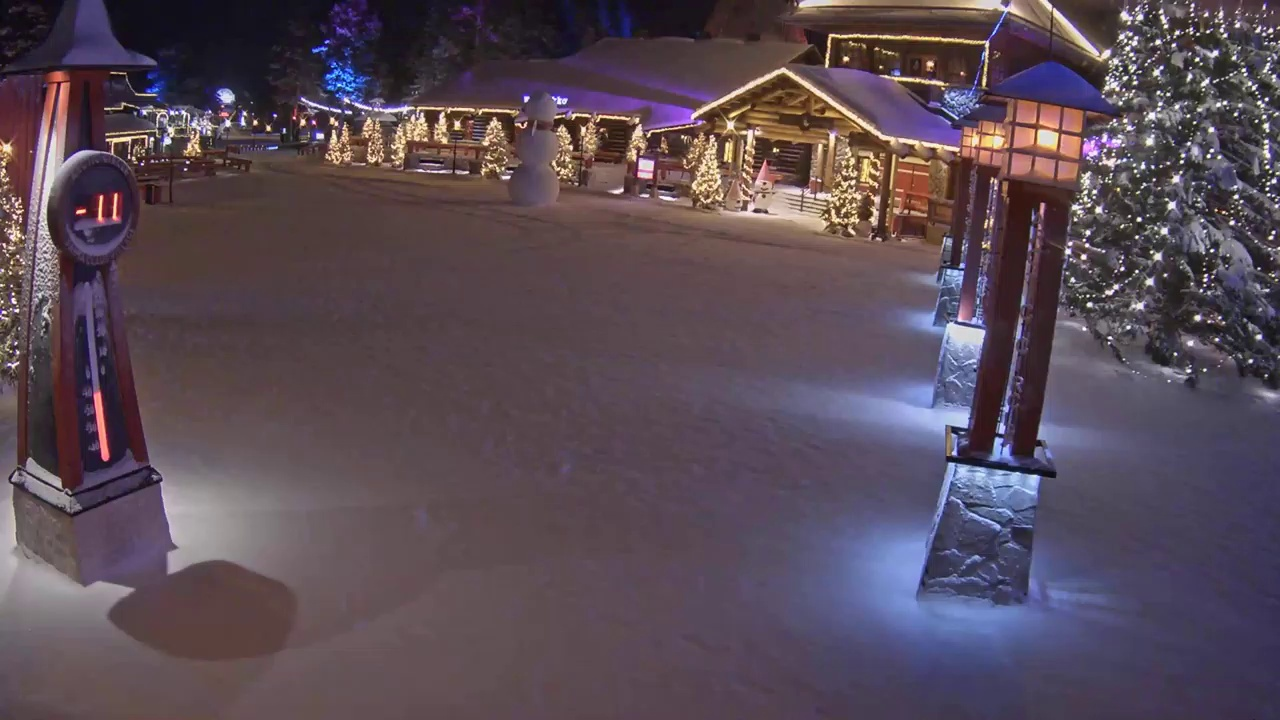

In [ ]:
#| eval: false
# Display the captured image
from IPython.display import Image
Image("/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.20_02:52:52_None.jpg")

In [ ]:
#| eval: false
# Ask the GPT-4 Vision model about the image
messages.append(form_msg(
    "user", 
    "Use the GPT-4 Vision model to tell the number of people and briefly describe the image."
))
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
The image captured from the Santa Claus Village live feed has the following details:  - **Number of
People**: 0 - **Dimensions**: 1280 x 720 - **Temperature**: -11°C - **Number of Buildings**: 1 (1-2
stories tall) - **Number of Cars/Trucks**: 0 - **Available Parking Spaces**: 0 - **Number of Street
Lights**: 6 - **Time of Day**: Night - **Artificial Lighting**: Prominent - **Visibility**: Clear -
**Sky Visibility**: Not visible (dark sky conditions) - **Waterbodies Visible**: No  Overall, the
image depicts a clear, well-lit night scene at the Santa Claus Village with no people present.


In [ ]:
#| eval: false
# Detect the objects in the image using YOLO
messages.append(form_msg(
    "user",
    "Use YOLO to detect the number of people in the image and any other objects \
in the image."
))
complete(messages, tools=tools)
print_msg(messages[-1])


image 1/1 /home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.20_02:52:52_None.jpg: 384x640 (no detections), 46.5ms
Speed: 1.9ms preprocess, 46.5ms inference, 38.2ms postprocess per image at shape (1, 3, 384, 640)
>> Assistant:
The YOLO model did not detect any people or other objects in the image.


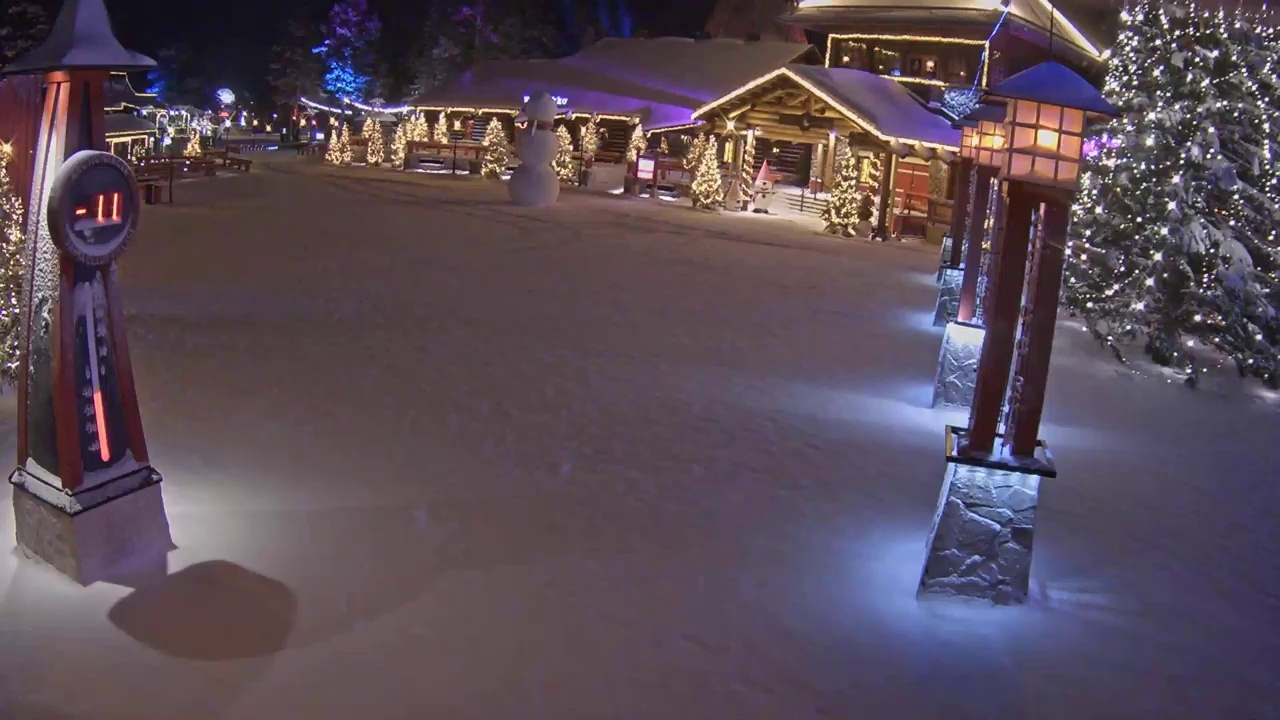

In [ ]:
#| eval: false
# Display the detection image
Image("/home/nghivo/tinyMLaaS/llmcam/data/detection_cap_2024.12.20_02:52:52_None.jpg")

## Step 3 - Pipeline extension with plotting

We can further extend the comparison pipeline with any reporting tools or monitoring utilities (demonstrated in demo scenario 3). In this demo, we will use the built-in tool from `llmcam.vision.plotting` to create bar plot between these two models. 

At this step, the main tasks include:

- Capture another image to increase data volume in plots.  
- Plot the number of people with both models.

In [ ]:
#| eval: false
# Capture another image from the live feed
messages.append(form_msg(
    "user", 
    "Capture another image from the live feed."
))
complete(messages, tools=tools)
print_msg(messages[-1])

[youtube] Extracting URL: https://www.youtube.com/watch?v=Cp4RRAEgpeU
[youtube] Cp4RRAEgpeU: Downloading webpage
[youtube] Cp4RRAEgpeU: Downloading ios player API JSON
[youtube] Cp4RRAEgpeU: Downloading mweb player API JSON
[youtube] Cp4RRAEgpeU: Downloading m3u8 information
[youtube] Cp4RRAEgpeU: Downloading m3u8 information
>> Assistant:
Another image from the Santa Claus Village live feed has been captured. The file path of the saved
image is:  `/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.20_02:53:58_None.jpg`.


In [ ]:
#| eval: false
# Plot the number of people in the captured images using both GPT-4 Vision and YOLO
messages.append(form_msg(
    "user",
    "Plot the number of people in these captured images using both methods \
 - GPT retrieval of basic information and YOLO object detection. \
Tell me the file path of the generated plot."
))
complete(messages, tools=tools)
print_msg(messages[-1])


image 1/1 /home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.20_02:52:52_None.jpg: 384x640 (no detections), 11.1ms
Speed: 1.3ms preprocess, 11.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.20_02:53:58_None.jpg: 384x640 (no detections), 11.4ms
Speed: 1.3ms preprocess, 11.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
>> Assistant:
The plot showing the number of people detected in the captured images using both GPT retrieval and
YOLO object detection methods has been generated. The file path of the generated plot is:
`/home/nghivo/tinyMLaaS/llmcam/data/423_object_count_plot.jpg`.


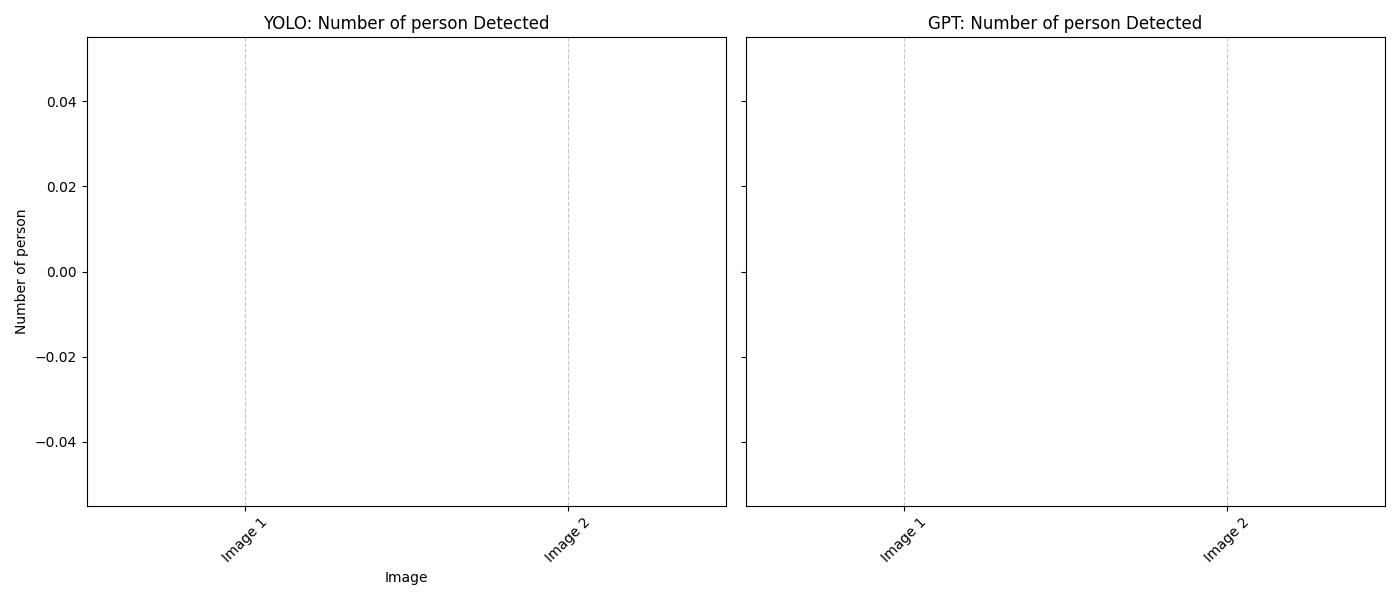

In [ ]:
#| eval: false
Image("/home/nghivo/tinyMLaaS/llmcam/data/423_object_count_plot.jpg")

## **CONVERSATION TRANSCRIPT**

In [ ]:
#| eval: false
print_msgs(messages)

>> System:
You are a helpful system administrator. Use the supplied tools to help the user.
>> User:
What tools can you use?
>> Assistant:
I can use the following tools:  1. **capture_youtube_live_frame**: This captures a JPEG image from a
YouTube Live stream and returns the path to the saved image.  2. **ask_gpt4v_about_image_file**:
This provides detailed quantitative information about a given image file.  3. **detect_objects**:
This detects objects in an image using the YOLO model.  4. **plot_object**: This generates a bar
plot displaying the number of instances of a specified object detected in a list of images. It can
utilize information extraction methods like "gpt" and "yolo".
>> User:
Here is the live feed for Santa Claus Village https://www.youtube.com/watch?v=Cp4RRAEgpeU to
capture. Tell me also the file path of the saved image.
>> Assistant:
The image from the Santa Claus Village live feed has been captured. The file path of the saved image
is:   `/home/nghivo/tinyMLaaS/llmc